<a href="https://colab.research.google.com/github/Jrk373/MachineLearningDemo/blob/main/MachineLearningDemo_20240119.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Create a Narrow AI using Linear Regression
John Ryan Kivela  
The Narbha Institute  
January 2025


# Introduction

This is walkthrough demonstration of fundemental Machine Learning concepts and techniques used in developing Artificial Intelligence (AI).

The activity will create a Narrow Artificial Intelligence, called Rayne 1.0, who will tell us a person's income based on healthcare indicators.

Narrow AI, also known as Weak AI, is a type of artificial intelligence designed to perform a specific task or solve a particular problem with high efficiency. Unlike General AI, Narrow AI is limited in scope and cannot adapt to tasks outside its predefined domain.

**Meet Rayne!**

They deliver Sales Price, with attitude.

 <img src="https://github.com/Jrk373/MachineLearningDemo/blob/main/Kid.jpg?raw=true" alt="Rayne 1.0" width="250" height="400" />

## Intended Audience

- The intended audience is a discerning group of professionals with strong data literacy, advanced education in mathematics like Central Limits Theorum (Mean, Median, Mode, Standard Deviation, etc.), and basic Linear Algebra.

- It is not necessary to understand computer languages for this activity. This notebook primarily speaks in Python, but it is programmed to run all code and calculations out-of-the-box.

## Materials

- This notebook is open source. All of these materials will be located in a public Github repository.

  https://github.com/Jrk373/MachineLearningDemo

- The goal is for the instructor to walk through the Notebook with the audience watching and discussing. Then the instructor and the class go through the notebook together. The learner can then go on to use the Notebook on their own.

## CRISP-DM

CRISP-DM stands for Cross-Industry Standard Process for Data Mining. It's a popular method used to guide data mining and data science projects. The process is divided into six main phases:

- **Business Understanding:** Understand the project's goals and requirements from a business perspective.
- **Data Understanding:** Collect and analyze the data to understand its characteristics.
- **Data Preparation:** Clean and prepare the data for analysis.
- **Modeling:** Apply different modeling techniques to the prepared data.
- **Evaluation:** Assess the models to ensure they meet the business objectives.
- **Deployment:** Implement the model in the real-world environment and monitor its performance.

## Object Oriented Programming

## Python

## Jupyter Notebooks

The notebook relies heavily on foundations from the ODSC West 2024 AI Bootcamp. It is referenced specificfally throughout, but can also be acknoweldged broadly as the inspiration for this notebook. This notebook also partners with AI as a generator of code and content.

## Enjoy!

# Stage 1: Business Understanding





The Business Understanding phase of CRISP-DM focuses on defining the project’s goals and objectives from a business perspective. This stage ensures that the data science work aligns with the organization’s needs and delivers value.

# Stage 2: Data Understanding

The Data Understanding phase of the CRISP-DM (Cross-Industry Standard Process for Data Mining) framework focuses on exploring and analyzing the available data to ensure it is suitable for the project's goals.

It involves the following steps:

- **Data Collection:** Gather initial data from relevant sources.

- **Data Description:** Summarize key attributes, including data types, formats, and basic statistics (e.g., means, counts, ranges).

- **Data Exploration:** Use visualizations and analyses to identify patterns, trends, or potential relationships in the data.

- **Data Quality Assessment:** Check for issues such as missing values, outliers, inconsistencies, or inaccuracies.
The objective is to develop insights into the data, identify challenges, and determine whether it can support the project's objectives effectively.

## Healthcare Data Set

The **Synthetic Healthcare Dataset** is designed to model patient demographics, health outcomes, and resource utilization patterns for research and educational purposes. It includes 10,000 records representing anonymized and fictitious patients from diverse regions. The dataset incorporates a wide range of attributes, including biometric measurements, health conditions, healthcare costs, and lifestyle factors, ensuring a comprehensive simulation of real-world healthcare scenarios.

While the data is entirely synthetic and free of any personally identifiable information, it adheres to realistic distributions and correlations, making it a robust resource for testing machine learning algorithms, conducting statistical analyses, and exploring healthcare trends.

In [30]:
import urllib.request
import pandas as pd

DataSetName = 'Healthcare Data'

# Correct raw URL
url = 'https://raw.githubusercontent.com/Jrk373/MachineLearningDemo/main/synthetic_healthcare_data.csv'
file_path = 'synthetic_healthcare_data.csv'

# Download the file
urllib.request.urlretrieve(url, file_path)

# Load the dataset
try:
    df = pd.read_csv(file_path)
    print(f'Successfully downloaded {DataSetName}')
    print('Data successfully loaded as data frame "df"')
except Exception as e:
    print(f"An error occurred: {e}")



Successfully downloaded Healthcare Data
Data successfully loaded as data frame "df"


### Data Dictionary

| **Column Name**        | **Description**                                            | **Data Type**     | **Example Values**              |
|-------------------------|-----------------------------------------------------------|-------------------|----------------------------------|
| PatientID              | Unique identifier for each patient                        | String            | P00001, P00002                  |
| Age                    | Age of the patient in years                               | Integer           | 25, 37, 64                      |
| Gender                 | Gender of the patient                                     | String            | Male, Female                    |
| Height_cm              | Height of the patient in centimeters                      | Integer           | 160, 175, 180                   |
| Weight_kg              | Weight of the patient in kilograms                        | Integer           | 60, 75, 90                      |
| BloodPressure_Sys      | Systolic blood pressure in mmHg                           | Integer           | 120, 130, 140                   |
| BloodPressure_Dia      | Diastolic blood pressure in mmHg                          | Integer           | 80, 85, 90                      |
| Cholesterol            | Cholesterol level in mg/dL                                | Integer           | 180, 220, 250                   |
| Glucose                | Blood glucose level in mg/dL                              | Integer           | 90, 110, 150                    |
| HeartRate              | Heart rate in beats per minute                            | Integer           | 70, 80, 90                      |
| SmokingStatus          | Smoking habits of the patient                             | String            | Non-Smoker, Smoker, Former Smoker |
| DiseaseHistory         | Patient's disease history                                 | String            | None, Diabetes, Hypertension    |
| MedicationCount        | Number of medications currently prescribed                | Integer           | 0, 1, 3                         |
| HospitalVisits         | Number of hospital visits in the past year                | Integer           | 1, 2, 4                         |
| InsuranceType          | Type of insurance coverage                                | String            | Private, Medicare, None          |
| TreatmentOutcome       | Outcome of the treatment                                  | String            | Improved, Stable, Worsened       |
| BMI                    | Body Mass Index (calculated from height and weight)       | Float             | 22.1, 24.5, 28.7                |
| TotalCost              | Total healthcare cost in USD                              | Integer           | 5000, 12000, 30000              |
| PharmacyCost           | Pharmacy-related cost in USD                              | Integer           | 500, 2000, 3500                 |
| HealthRating           | Health rating on a scale of 1 to 5                        | Integer           | 1, 3, 5                         |
| EnvironmentRating      | Environmental rating on a scale of 0 to 5                 | Integer           | 0, 2, 5                         |
| AdjustedGrossIncome    | Adjusted gross income in USD                              | Integer           | 40000, 90000, 120000            |
| EmploymentStatus       | Employment status of the patient                          | String            | Employed, Unemployed, Retired   |
| EducationLevel         | Education level of the patient                            | String            | High School, Bachelor, Master   |
| LGBTQ                  | Identifies as LGBTQ (Yes/No)                              | String            | Yes, No                         |
| NumChronicConditions   | Number of chronic conditions the patient has              | Integer           | 0, 2, 5                         |
| ExerciseHours          | Average hours of exercise per week                        | Integer           | 0, 7, 10                        |
| SleepHours             | Average hours of sleep per day                            | Integer           | 4, 6, 8                         |
| ScreenTime             | Daily screen time in hours                                | Integer           | 2, 6, 8                         |
| WaterIntake            | Daily water intake in liters                              | Integer           | 1, 5, 9                         |
| StepsPerDay            | Average steps taken per day                               | Integer           | 1000, 5000, 12000               |
| PetOwnership           | Whether the patient owns pets                             | String            | Yes, No                         |
| DietPreference         | Dietary preferences of the patient                        | String            | Vegetarian, Vegan, Omnivore     |
| CityType               | Type of living environment                                | String            | Urban, Suburban, Rural          |
| MaritalStatus          | Marital status of the patient                             | String            | Single, Married, Divorced       |
| WorkShift              | Work shift of the patient                                 | String            | Day, Night, Rotational          |

### Data Shape

Assessing the shape of data helps identify its dimensionality (rows and columns), which is crucial for understanding its structure and determining suitable analysis techniques. It ensures the dataset is in the expected format, enabling error detection and proper preprocessing. Additionally, knowing the data shape aids in resource optimization and selecting the right tools for analysis.

In [16]:
# Import necessary packages
import pandas as pd

# Check the shape (rows, columns)
print('Data set rows and columns:', df.shape)

Data set rows and columns: (10000, 36)


In [17]:
# Import necessary packages
import pandas as pd

# Print off the first 5 rows
print(df.head(5))

  PatientID  Age  Gender  Height_cm  Weight_kg  BloodPressure_Sys  \
0    P00001   69    Male        178        110                166   
1    P00002   32    Male        154         56                149   
2    P00003   89  Female        161         87                 96   
3    P00004   78    Male        162         70                154   
4    P00005   38  Female        171         57                162   

   BloodPressure_Dia  Cholesterol  Glucose  HeartRate  ... ExerciseHours  \
0                112          263       93        104  ...             3   
1                 89          297      139        118  ...             9   
2                 98          274      171         85  ...             0   
3                107          236      196         73  ...             5   
4                108          160      187        110  ...             3   

  SleepHours  ScreenTime  WaterIntake StepsPerDay PetOwnership  \
0          7           2            5       14346          Yes

In [18]:
# Import necessary packages
import pandas as pd

# Lets get more basic information on columns, datatypes etc using .info()
print('Feature Information:')
print(df.info())

Feature Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PatientID             10000 non-null  object 
 1   Age                   10000 non-null  int64  
 2   Gender                10000 non-null  object 
 3   Height_cm             10000 non-null  int64  
 4   Weight_kg             10000 non-null  int64  
 5   BloodPressure_Sys     10000 non-null  int64  
 6   BloodPressure_Dia     10000 non-null  int64  
 7   Cholesterol           10000 non-null  int64  
 8   Glucose               10000 non-null  int64  
 9   HeartRate             10000 non-null  int64  
 10  SmokingStatus         10000 non-null  object 
 11  DiseaseHistory        7502 non-null   object 
 12  MedicationCount       10000 non-null  int64  
 13  HospitalVisits        10000 non-null  int64  
 14  InsuranceType         6662 non-null   object 
 15 

### Descriptive statistics

#### Numerical Data

Descriptive Statistics provide for numerical columns in a dataset. It typically includes:

- **Count:** The number of non-missing values.
- **Mean**: The average value.
- **Standard Deviation (std):** A measure of data dispersion or variability.
- **Minimum(min):** The smallest value in the dataset.
- **25th Percentile (25%):**The first quartile, indicating the value below which 25% of the data lies.
- **50th Percentile (50%):**The median, representing the midpoint of the data.
- **75th Percentile (75%):**The third quartile, indicating the value below which 75% of the data lies.
- **Maximum(max):** The largest value in the dataset.

In [19]:
# Import necessary packages
import pandas as pd

# Get Descriptive statistics for all NUMERICAL columns
numerical_stats = df.describe()
print(numerical_stats)

# Choose a specific feature
Feature = 'AdjustedGrossIncome'

# Get Descriptive statistics for specific feature
feature_stats = df[Feature].describe()
print('Feature Stats:', Feature)
print(feature_stats)

                Age     Height_cm     Weight_kg  BloodPressure_Sys  \
count  10000.000000  10000.000000  10000.000000       10000.000000   
mean      53.539700    174.435300     84.464600         133.873400   
std       20.757324     14.418218     20.138478          25.901607   
min       18.000000    150.000000     50.000000          90.000000   
25%       36.000000    162.000000     67.000000         111.000000   
50%       53.000000    174.000000     84.000000         134.000000   
75%       72.000000    187.000000    102.000000         156.000000   
max       89.000000    199.000000    119.000000         179.000000   

       BloodPressure_Dia   Cholesterol       Glucose     HeartRate  \
count       10000.000000  10000.000000  10000.000000  10000.000000   
mean           89.435900    224.612600    134.761500     84.167000   
std            17.288377     43.454778     37.478277     20.137688   
min            60.000000    150.000000     70.000000     50.000000   
25%            75.0

#### Categorical Data

For categorical columns, the describe() method provides the following summary statistics:

- **Count:** The total number of non-null (non-NaN) entries in the column.
- **Unique:** The number of distinct unique values in the column.
- **Top:** The most frequently occurring value in the column (the mode).
- **Freq:** The frequency of the most common value (how many times top appears).

In [22]:
# Import necessary packages
import pandas as pd

# Get descriptive statistics for CATEGORICAL columns
categorical_stats = df.describe(include=['object'])
print(categorical_stats)

# Choose a specific feature
Feature = 'Gender'

# Get Descriptive statistics for specific feature
feature_stats = df[Feature].describe(include=['object'])
print('Feature Stats:', Feature)
print(feature_stats)

       PatientID  Gender SmokingStatus DiseaseHistory InsuranceType  \
count      10000   10000         10000           7502          6662   
unique     10000       2             3              3             2   
top       P00001  Female    Non-Smoker       Diabetes       Private   
freq           1    5072          3387           2519          3331   

       TreatmentOutcome EmploymentStatus EducationLevel  LGBTQ PetOwnership  \
count             10000            10000          10000  10000        10000   
unique                3                4              4      2            2   
top              Stable       Unemployed      Doctorate    Yes          Yes   
freq               3415             2542           2541   5126         5056   

       DietPreference  CityType MaritalStatus   WorkShift  
count           10000     10000         10000       10000  
unique              4         3             4           3  
top          Omnivore  Suburban      Divorced  Rotational  
freq    

### Missing Values

Identifying missing values in a dataset is essential to understand their potential impact on the target variable, as missing data can distort relationships and introduce bias. Properly addressing missing values ensures the model accurately captures patterns in the target variable, leading to better performance and more reliable predictions.


In [23]:
# Import necessary packages
import pandas as pd

# Identifying missing values in the dataset
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values = missing_values[missing_values > 0]  # Filter out columns with no missing values

print('Missing Values:')
print(missing_values)

Missing Values:
InsuranceType     3338
DiseaseHistory    2498
dtype: int64


### Unique Values

Identifying unique values helps understand the diversity and distribution of data, which is crucial for feature selection and data preprocessing. It ensures the model captures meaningful patterns and avoids redundant or irrelevant information that could impact performance.

In [24]:
# Import necessary packages
import pandas as pd

# Identifying the number of unique values in each column
unique_values = df.nunique().sort_values(ascending=False)

# Set the option to display up to 100 rows (or any number you prefer)
pd.set_option('display.max_rows', 100)

print('Unique Values:')
print(unique_values)

Unique Values:
PatientID               10000
AdjustedGrossIncome      9620
TotalCost                9068
StepsPerDay              7155
PharmacyCost             4261
BMI                       201
Cholesterol               150
Glucose                   130
BloodPressure_Sys          90
Age                        72
HeartRate                  70
Weight_kg                  70
BloodPressure_Dia          60
Height_cm                  50
ExerciseHours              15
HospitalVisits             10
WaterIntake                 9
ScreenTime                  8
SleepHours                  6
NumChronicConditions        6
EnvironmentRating           6
HealthRating                5
MedicationCount             5
EmploymentStatus            4
EducationLevel              4
DietPreference              4
MaritalStatus               4
TreatmentOutcome            3
DiseaseHistory              3
SmokingStatus               3
CityType                    3
WorkShift                   3
LGBTQ                    

### Target Feature

The **Sale Price** of homes is our Target Feature (Dependent Variable)

#### Descriptive Statistics

Descriptive Statistics provide for the Target Feature:

- **Count:** The number of non-missing values.
- **Mean**: The average value.
- **Standard Deviation (std):** A measure of data dispersion or variability.
- **Minimum(min):** The smallest value in the dataset.
- **25th Percentile (25%):** The first quartile, indicating the value below which 25% of the data lies.
- **50th Percentile (50%):** The median, representing the midpoint of the data.
- **75th Percentile (75%):** The third quartile, indicating the value below which 75% of the data lies.
- **Maximum(max):** The largest value in the dataset.

In [27]:
# Import necessary packages
import pandas as pd

# Select Target Feature
Target = 'AdjustedGrossIncome'

# Get summary statistics
summary = df[Target].describe()

print('Summary Statistics:', Target)
print(summary)

Summary Statistics: AdjustedGrossIncome
count     10000.000000
mean      85754.890100
std       39196.903634
min       20001.000000
25%       52562.000000
50%       86426.000000
75%      117619.500000
max      880023.000000
Name: AdjustedGrossIncome, dtype: float64


#### Missing Values

Identifying missing values in a dataset is essential to understand their potential impact on the target variable, as missing data can distort relationships and introduce bias. Properly addressing missing values ensures the model accurately captures patterns in the target variable, leading to better performance and more reliable predictions.

In [28]:
# Import necessary packages
import pandas as pd

# Check for missing values
missing_values = df[Target].isnull().sum()

print('Missing Values -', Target, ':', missing_values)

Missing Values - AdjustedGrossIncome : 0


#### Histogram

The plot displays the distribution (histogram) of house sale prices, giving us an idea of the shape, central tendency, and spread of the data.

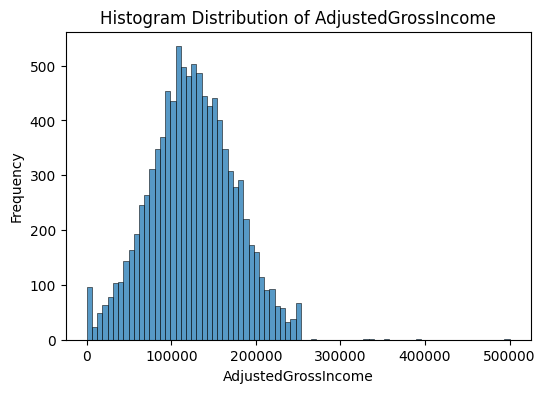

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the variable
Target = 'AdjustedGrossIncome'

# Create the histogram plot with dark blue color
plt.figure(figsize=(6, 4))  # Set the figure size before plotting
sns.histplot(df[Target])
plt.title(f'Histogram Distribution of {Target}')
plt.xlabel(Target)
plt.ylabel('Frequency')

# Show the plot
plt.show()

### Correlation Matrix

The **Correlation Matrix** shows which numerical features are most strongly related to the sale price of houses, with the strongest relationships listed first. This helps identify which features are most important for predicting house prices.

In [35]:
# Import necessary packages
import numpy as np
import pandas as pd

# Select Target Feature
Target = 'AdjustedGrossIncome'

# Calculating correlation matrix for numerical features
# Select only numerical columns for correlation calculation
correlation_matrix = df.select_dtypes(include=np.number).corr()
Target_correlation = correlation_matrix[Target].sort_values(ascending=False)

print('Correlation to', Target, ':')
print(Target_correlation)

Correlation to AdjustedGrossIncome :
AdjustedGrossIncome     1.000000
WaterIntake             0.017523
ScreenTime              0.015305
HeartRate               0.011284
Cholesterol             0.008906
StepsPerDay             0.006969
Age                     0.006787
Height_cm               0.006166
HospitalVisits          0.003718
BMI                     0.001206
EnvironmentRating       0.000155
SleepHours             -0.000154
ExerciseHours          -0.001449
MedicationCount        -0.002532
Weight_kg              -0.003640
BloodPressure_Sys      -0.004492
NumChronicConditions   -0.004708
TotalCost              -0.004837
BloodPressure_Dia      -0.011292
Glucose                -0.012504
PharmacyCost           -0.016656
HealthRating           -0.021095
Name: AdjustedGrossIncome, dtype: float64


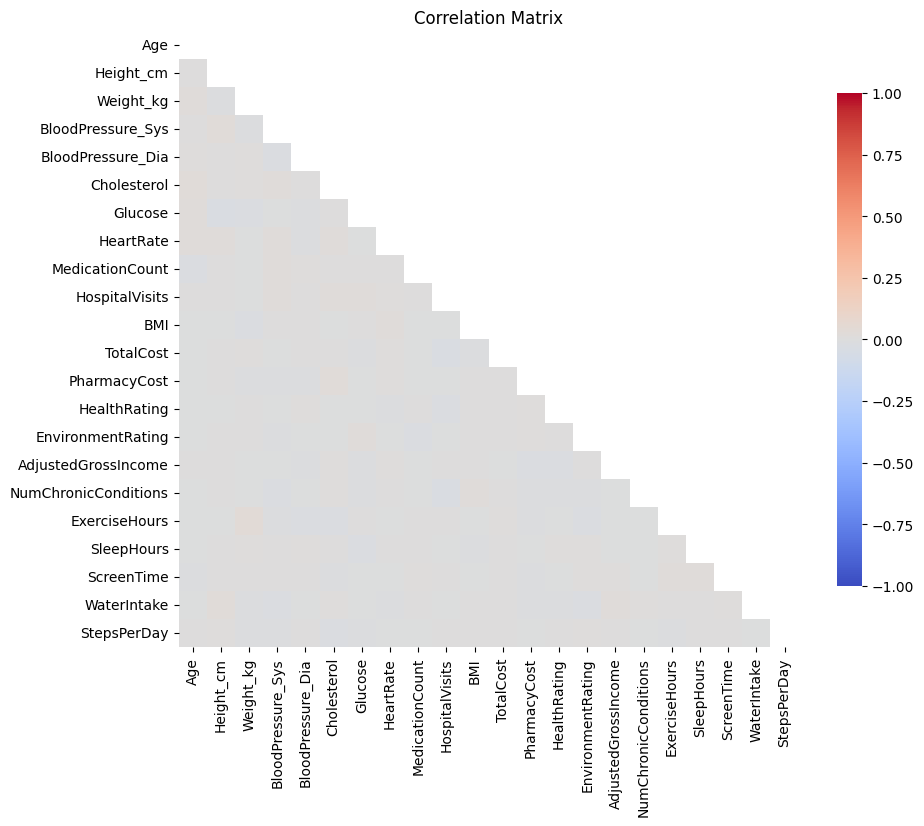

In [36]:
# Import necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for numerical features
correlation_matrix = df.select_dtypes(include=np.number).corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask, range set from -1 to 1
sns.heatmap(
    correlation_matrix,
    mask=mask,
    annot=False,  # Optional: Display correlation values
    fmt='.2f',
    cmap='coolwarm',
    cbar_kws={"shrink": 0.8},
    vmin=-1,  # Set minimum value to -1
    vmax=1    # Set maximum value to 1
)

# Add title
plt.title('Correlation Matrix')

# Show plot
plt.show()

### Strongest Correlations

In [ ]:
# Import necessary packages
import pandas as pd
import numpy as np

# Automatically updating summary
summary = f'The numerical features most strongly correlated (r>0.45) with {Target}\n'
for feature, correlation in Target_correlation.items():
    if correlation > 0.45:
        summary += f"- {feature}: {correlation:.2f}\n"

print(summary)

The numerical features most strongly correlated (r>0.45) with SalePrice
- SalePrice: 1.00
- OverallQual: 0.79
- GrLivArea: 0.71
- GarageCars: 0.64
- GarageArea: 0.62
- TotalBsmtSF: 0.61
- FstFlrSF: 0.61
- FullBath: 0.56
- TotRmsAbvGrd: 0.53
- YearBuilt: 0.52
- YearRemodAdd: 0.51
- GarageYrBlt: 0.49
- MasVnrArea: 0.48
- Fireplaces: 0.47



## Scaling and Normalization
In machine learning, the scale of input data can affect how well algorithms perform.

Here’s why we scale and normalize features:

- **Algorithm Sensitivity:** Some algorithms, like linear regression and SVM, are sensitive to the size of input features.

Features with larger ranges can overshadow smaller ones, leading to biased predictions. Scaling ensures all features contribute equally.

- **Interpretability:** Normalization can make models easier to understand by putting feature values on a common scale.

In real life, we would assess each of the features we intend to use, but we'll just focus on one for this exercise.

### Why Compare a Distribution, Standard Distribution, and Min-Max Distribution?

1. **Understanding Original Data:**
   - The original distribution shows the raw data and its inherent properties, such as skewness, central tendency, and spread.
   - Comparing it to scaled versions (Standard and Min-Max distributions) helps assess the impact of scaling and whether it preserves key characteristics.

2. **Purpose of Standard Scaling:**
   - StandardScaler scales the data to have a **mean of 0** and **standard deviation of 1**.
   - This is critical for machine learning algorithms (e.g., SVM, logistic regression) that are sensitive to the magnitude of features and require features to be on a similar scale.

3. **Purpose of Min-Max Scaling:**
   - MinMaxScaler scales the data to fit within a **fixed range (e.g., 0 to 1)**.
   - This is useful for algorithms like neural networks or clustering that work better when all features are normalized within a specific range.

4. **Insights from Comparison:**
   - By comparing the distributions, you can identify if scaling significantly alters the shape of the data, such as whether skewness or outliers are exaggerated or suppressed.
   - It ensures that scaling aligns with the requirements of your machine learning models or data analysis techniques.

---

### Why Look at Distributions with 100 Bins Versus 1000 Bins?

1. **100 Bins (Coarse-Grained View):**
   - A smaller number of bins provides a **general overview** of the data distribution.
   - It is useful for **quick insights** into the general shape, such as whether the data is normal, skewed, or uniform.
   - Helps avoid overfitting visual interpretation, especially for small datasets where too many bins might highlight irrelevant noise.

2. **1000 Bins (Fine-Grained View):**
   - A larger number of bins gives a **detailed view** of the data distribution.
   - Useful for **large datasets** or when you need precise insights, such as identifying subtle patterns, outliers, or gaps in the data.
   - Can reveal micro-level details that might be obscured with fewer bins.

---

By combining these scaling methods and varying bin sizes, you gain a comprehensive understanding of your data's behavior, ensuring better preprocessing decisions and more effective model performance.


### Compare Distributions

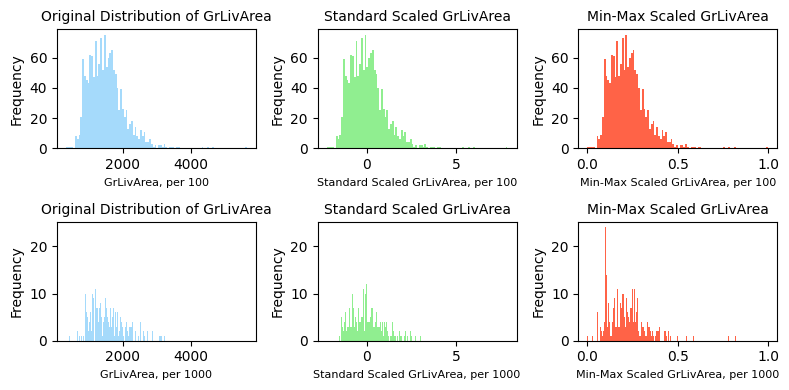

In [ ]:
# Import necessary packages
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Select Feature
Feature = 'GrLivArea'

# Feature Scaling using StandardScaler (Mean = 0, Standard Deviation = 1)
scaler_standard = StandardScaler()
df[f'{Feature}_standard_scaled'] = scaler_standard.fit_transform(df[[Feature]])

# Feature Scaling using MinMaxScaler (Scaled between 0 and 1)
scaler_minmax = MinMaxScaler()
df[f'{Feature}_minmax_scaled'] = scaler_minmax.fit_transform(df[[Feature]])

# Let's visualize the scaled features
plt.figure(figsize=(8, 4))  # Adjusted size to fit 2 rows and 3 columns

# Original Distribution (bins = 100)
plt.subplot(2, 3, 1)
sns.histplot(df[Feature], bins=100, color='#87CEFA', edgecolor=None)
plt.title(f'Original Distribution of {Feature}', fontsize=10)
plt.xlabel(f'{Feature}, per 100', fontsize=8)
plt.ylabel('Frequency')

# Standard Scaled Distribution (bins = 100)
plt.subplot(2, 3, 2)
plt.hist(df[f'{Feature}_standard_scaled'], bins=100, color='#90EE90', edgecolor=None)
plt.title(f'Standard Scaled {Feature}', fontsize=10)
plt.xlabel(f'Standard Scaled {Feature}, per 100', fontsize=8)
plt.ylabel('Frequency')

# Min-Max Scaled Distribution (bins = 100)
plt.subplot(2, 3, 3)
plt.hist(df[f'{Feature}_minmax_scaled'], bins=100, color='#FF6347', edgecolor=None)
plt.title(f'Min-Max Scaled {Feature}', fontsize=10)
plt.xlabel(f'Min-Max Scaled {Feature}, per 100', fontsize=8)
plt.ylabel('Frequency')

# Original Distribution (bins = 1000)
plt.subplot(2, 3, 4)
sns.histplot(df[Feature], bins=1000, color='#87CEFA', edgecolor=None)
plt.title(f'Original Distribution of {Feature}', fontsize=10)
plt.xlabel(f'{Feature}, per 1000', fontsize=8)
plt.ylabel('Frequency')

# Standard Scaled Distribution (bins = 1000)
plt.subplot(2, 3, 5)
plt.hist(df[f'{Feature}_standard_scaled'], bins=1000, color='#90EE90', edgecolor=None)
plt.title(f'Standard Scaled {Feature}', fontsize=10)
plt.xlabel(f'Standard Scaled {Feature}, per 1000', fontsize=8)
plt.ylabel('Frequency')

# Min-Max Scaled Distribution (bins = 1000)
plt.subplot(2, 3, 6)
plt.hist(df[f'{Feature}_minmax_scaled'], bins=1000, color='#FF6347', edgecolor=None)
plt.title(f'Min-Max Scaled {Feature}', fontsize=10)
plt.xlabel(f'Min-Max Scaled {Feature}, per 1000', fontsize=8)
plt.ylabel('Frequency')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

# Stage 3: Data Preparation

## Handling missing values

Missing categorical values will be replaced by the most often appearing (mode) value for the respective feature.

Missing numerical values will be replaced by the average (mean) value for the respective feature.

In [ ]:
# Import necessary packages
import pandas as pd
import numpy as np

# Select Target Feature
Target = 'SalePrice'

# Fill missing values
for column in df.columns:
    if df[column].dtype == 'object':
        # Categorical columns: fill with mode
        df[column] = df[column].fillna(df[column].mode()[0])
    else:
        # Numerical columns: fill with mean
        df[column] = df[column].fillna(df[column].mean())

# Check for missing values in Target Feature
missing_target_values = df[Target].isnull().sum()
print(f'Missing Values - {Target}: {missing_target_values}')

# Check for missing values in the dataset
missing_values = df.isnull().sum().sort_values(ascending=False)

# If any missing values remain, print them; otherwise, confirm the dataset is clean
if missing_values.sum() > 0:
    print("Missing Values Remaining:")
    print(missing_values[missing_values > 0])
else:
    print("All missing values have been successfully handled.")

Missing Values - SalePrice: 0
All missing values have been successfully handled.


## Feature Engineering:
Feature engineering involves creating new features or modifying existing ones to improve the performance of machine learning models. Here are some common strategies:

#### Add Total Square Feet (TotalSF):

Create a Feature called **"TotalSF"** which is the sum of the respective square footage measurements of the home.

- 1st Floor sq ft + 2nd floor sq ft + Basement sq ft

In [ ]:
# Import necessary packages
import pandas as pd

# Create new feature
New_feature = 'TotalSF'

# Define New Feature
df[New_feature] = df['FstFlrSF'] + df['SndFlrSF'] + df['TotalBsmtSF']

# Get summary statistics
summary = df[New_feature].describe()

print('Summary Statistics for', New_feature, ':')
print(summary)

Summary Statistics for TotalSF :
count     1460.000000
mean      2567.048630
std        821.714421
min        334.000000
25%       2009.500000
50%       2474.000000
75%       3004.000000
max      11752.000000
Name: TotalSF, dtype: float64


#### Encoding Categorical Variables

##### One-hot Encoding (Making Dummy Variables)

One-hot encoding is used in machine learning to convert categorical (non-numerical) data variables into numerical format. Most machine learning models require numerical input data as this encoding helps the algorithms understand and process the data

<img src="https://github.com/Jrk373/MachineLearningDemo/blob/main/OneHotDiagram.jpg?raw=true" alt="One Hot Encoding" width="550" height="200" />

##### Let's review the data so far

In [ ]:
# Import necessary packages
import pandas as pd
import numpy as np

# Identify categorical columns - assuming they are of type 'object'
categorical_columns = df.select_dtypes(include=['object']).columns

## Print the shape to see how many new columns we have before updating
print(f"Shape before encoding: {df.shape}")

# Print unique values for each categorical column before encoding
print("Unique values in categorical columns before one-hot encoding:")
for column in categorical_columns:
    print(f"{column}: {df[column].unique()}")

Shape before encoding: (1460, 84)
Unique values in categorical columns before one-hot encoding:/n
MSZoning: ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street: ['Pave' 'Grvl']
Alley: ['Grvl' 'Pave']
LotShape: ['Reg' 'IR1' 'IR2' 'IR3']
LandContour: ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities: ['AllPub' 'NoSeWa']
LotConfig: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope: ['Gtl' 'Mod' 'Sev']
Neighborhood: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1: ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2: ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType: ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle: ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle: ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl: [

##### Now the magic

In [ ]:
# Import necessary packages
import pandas as pd
import numpy as np

# Apply one-hot encoding to all categorical variables
df_encoded = pd.get_dummies(df)

##### One-hot encoded data set

In [ ]:
# Import necessary packages
import pandas as pd
import numpy as np

## Print the shape to see how many new columns were added
print(f"Shape after encoding: {df_encoded.shape}")

# Identify new one-hot encoded columns
new_columns = [col for col in df_encoded.columns if col not in df.columns]

# Print unique values in the new one-hot encoded columns (they should only be 0 or 1)
print("\nUnique values in one-hot encoded columns:")
for column in new_columns:
    print(f"{column}: {df_encoded[column].unique()}")

Shape after encoding: (1460, 292)

Unique values in one-hot encoded columns:
MSZoning_C (all): [False  True]
MSZoning_FV: [False  True]
MSZoning_RH: [False  True]
MSZoning_RL: [ True False]
MSZoning_RM: [False  True]
Street_Grvl: [False  True]
Street_Pave: [ True False]
Alley_Grvl: [ True False]
Alley_Pave: [False  True]
LotShape_IR1: [False  True]
LotShape_IR2: [False  True]
LotShape_IR3: [False  True]
LotShape_Reg: [ True False]
LandContour_Bnk: [False  True]
LandContour_HLS: [False  True]
LandContour_Low: [False  True]
LandContour_Lvl: [ True False]
Utilities_AllPub: [ True False]
Utilities_NoSeWa: [False  True]
LotConfig_Corner: [False  True]
LotConfig_CulDSac: [False  True]
LotConfig_FR2: [False  True]
LotConfig_FR3: [False  True]
LotConfig_Inside: [ True False]
LandSlope_Gtl: [ True False]
LandSlope_Mod: [False  True]
LandSlope_Sev: [False  True]
Neighborhood_Blmngtn: [False  True]
Neighborhood_Blueste: [False  True]
Neighborhood_BrDale: [False  True]
Neighborhood_BrkSide: [False

##### Updated data types

In [ ]:
# Import necessary packages
import pandas as pd

# Define all common data types
all_data_types = ['int64', 'float64', 'object', 'bool', 'datetime64[ns]', 'category']

# Count the number of columns for each data type
data_type_counts = df_encoded.dtypes.value_counts()

# Convert the index to strings to avoid sorting issues
data_type_counts.index = data_type_counts.index.astype(str)

# Add missing data types with 0 count
for dtype in all_data_types:
    if dtype not in data_type_counts.index:
        data_type_counts[dtype] = 0

# Sort the results for consistent output
data_type_counts = data_type_counts.sort_index()

# Print the results
print("Number of columns by data type (including 0 counts):")
for dtype, count in data_type_counts.items():
    print(f"{dtype}: {count}")

Number of columns by data type (including 0 counts):
bool: 251
category: 0
datetime64[ns]: 0
float64: 5
int64: 36
object: 0


## Feature Transformation

Feature transformation in machine learning involves modifying or converting input data features to improve model performance or interpretability. This includes scaling, encoding, or creating new features to better represent underlying patterns, align with algorithm requirements, or enhance predictive accuracy.




### Correct skewness

Correcting skewness in machine learning ensures that features are more evenly distributed, which can improve the performance and stability of models sensitive to data distributions, such as linear regression or neural networks. It helps algorithms converge more effectively, reduces bias, and ensures the model captures patterns more accurately, particularly when extreme values distort relationships with the target variable.



**Logorythmic Transformation**

The logarithm of a number ( x ) to a given base ( b ) is the power to which the base must be raised to produce ( x ).

Mathematically, if ( y = \log_b(x) ), then ( b^y = x ).

*The log transformation primarily targets right-skewed distributions. By applying it to such data, the transformation compresses the long tail and expands the values closer to zero, making the distribution more symmetric and less skewed.*

When you apply a log transformation to a right-skewed distribution, you're essentially taking the logarithm of each data point. Mathematically, if you have a data point ( x ), the log transformation is ( \log(x) ). Here's what happens:

- **Compression of the Long Tail**: In a right-skewed distribution, there are a few very large values that stretch out the tail to the right. The log transformation compresses these large values because the logarithm of a large number is much smaller than the number itself. For example, ( \log(1000) = 3 ), which is much smaller than 1000.

- **Expansion of Values Closer to Zero:** For values that are closer to zero but still positive, the log transformation expands them. This is because the logarithm of a number between 0 and 1 is negative and decreases more slowly. For example, ( \log(0.1) = -1 ), which is a larger change compared to the original value.

- **Symmetrization of the Distribution:** By compressing the long tail and expanding the smaller values, the log transformation makes the distribution more symmetric. This reduces the skewness and makes the data more normally distributed, which is often a desirable property for statistical analysis.

Overall, the log transformation helps in stabilizing the variance and making the data more suitable for various statistical techniques. If you have any more questions or need further clarification, feel free to ask!

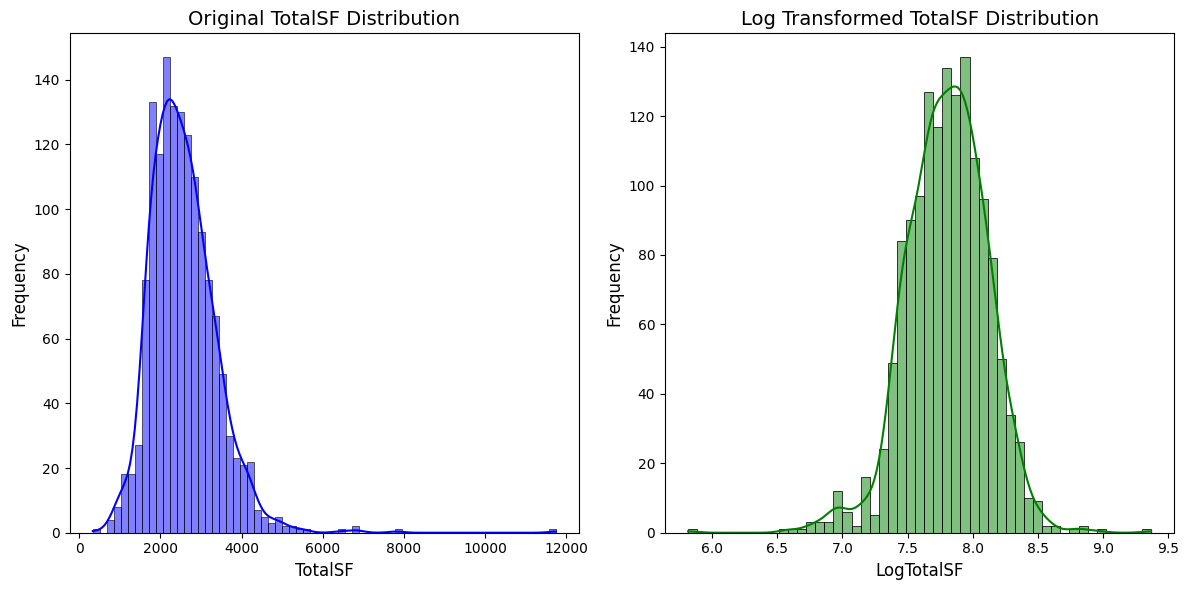

In [ ]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Feature name and its log-transformed version
Feature = 'TotalSF'
LogFeature = f'Log{Feature}'

# Apply the log transformation
df_encoded[LogFeature] = np.log(df_encoded[Feature] + 1)

# Creating the plots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # Adjusted figsize for better visibility

# Original Data Plot
sns.histplot(df_encoded[Feature], kde=True, ax=ax[0], color='blue')
ax[0].set_title('Original TotalSF Distribution', fontsize=14)
ax[0].set_xlabel('TotalSF', fontsize=12)
ax[0].set_ylabel('Frequency', fontsize=12)

# Transformed Data Plot
sns.histplot(df_encoded[LogFeature], kde=True, ax=ax[1], color='green')
ax[1].set_title('Log Transformed TotalSF Distribution', fontsize=14)
ax[1].set_xlabel('LogTotalSF', fontsize=12)
ax[1].set_ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()


### Remove unneccessary features

Removing unnecessary features in machine learning simplifies the model, reducing the risk of overfitting and improving generalization to unseen data. It enhances computational efficiency, eliminates irrelevant or redundant information, and ensures the model focuses only on the most predictive features, leading to better performance and interpretability.

Drop Case ID

In [ ]:
# Drop ID column/feature
house_df_encoded.drop('Id', axis=1, inplace=True)

print("Id removed")

## Feature Selection

Feature selection in machine learning is the process of identifying and retaining the most relevant features in a dataset to improve model performance, reduce complexity, and enhance interpretability.

#### Updated Correlation Matrix

Update the Correlation Matrix to reflect the performance of transformed and selected features.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'house_df_encoded' is your DataFrame
corr_matrix = house_df_encoded.corr().abs()

# Get the correlation of all features with 'SalePrice', excluding the target itself
saleprice_corr = corr_matrix['SalePrice'].drop('SalePrice')

# Define a threshold for selecting features, e.g., 0.5
threshold = 0.5

# Find features with correlation to 'SalePrice' greater than the threshold
selected_features = saleprice_corr[saleprice_corr > threshold].index.tolist()

# Filter and sort the correlations of the selected features in descending order
selected_saleprice_corr = saleprice_corr[selected_features].sort_values(ascending=False)

print("Correlation to Sale Price (r**2 > 0.5):")
print(selected_saleprice_corr)

In [ ]:
# Create a correlation matrix for the selected features
selected_corr_matrix = corr_matrix.loc[selected_features, selected_features]

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(selected_corr_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 4))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(selected_corr_matrix, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Add a title
plt.title("Correlation Matrix for Selected Features", fontsize=16)

# Show the plot
plt.show()

#### **Wrapper Method: Recursive Feature Elimination**

We couse use an algorithms like recursive feature elimination that consider the performance of a model to identify the best features.

Recursive Feature Elimination (RFE) is a feature selection method that fits a model and removes the weakest features until the specified number of features is reached. In scikit-learn, you can use RFE with various estimators (like linear regression, support vector machines, etc.) to identify the best features based on the model performance.

*To run this section correctly, clear all your notebook output and **SKIP  Threshold Correlation** code section*

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Assuming house_df_reduced has the features and target variable and is preprocessed.

# Define your target variable and predictors
X = house_df_encoded.drop('SalePrice', axis=1)
y = house_df_encoded['SalePrice']

# Create a linear regression model
model = LinearRegression()

# Create the RFE model and select, e.g., 20 features
rfe = RFE(model, n_features_to_select=20)

# Fit the model
fit = rfe.fit(X, y)

# Print the selected features
selected_features = X.columns[fit.support_]
print('Selected features:', selected_features)


# Stage 4: Data Model Training

The data modeling phase of CRISP-DM involves selecting and applying various modeling techniques to the prepared data. During this phase, data scientists choose appropriate algorithms and build models to uncover patterns and relationships within the data. They generate test designs, build multiple models, and assess their performance to determine the best approach.

This phase is iterative, meaning that adjustments and refinements are made based on the results obtained, ensuring that the models align with the business objectives and provide valuable insights.



## Train Test Split

The train-test split is a common technique used in machine learning to evaluate the performance of a model. This helps to ensure that the model generalizes well to new data and avoids overfitting.

- The **Train** set is used to train the model when the Target Feature value is known, while the **Test** set is used to evaluate its performance on unseen data.

- Typically, the data is split in a ratio such as 80:20 or 70:30, where the larger portion is used for training and the smaller portion for testing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score


# Selecting data for the features chosen by RFE and the target variable
# We have feature matrix, X_selected, and target y
X_selected = house_df_encoded[selected_features]
y = house_df_encoded['SalePrice']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

## Linear Regression Model Fit

The Linear Regression Model is a statistical method used to predict the value of a target variable based on one or more input features. By fitting this model to (mapping a regression line according to) the training data, it allows the model to learn the underlying relationship between the selected features and the target variable 'SalePrice'.

This process involves finding the best-fit line that minimizes the difference between the actual and predicted values of 'SalePrice', enabling the model to make accurate predictions on new, unseen data.

In [ ]:
# Creating a linear regression model
model = LinearRegression()

# Fitting the model with the training data
model.fit(X_train, y_train)

# Stage 5: Evaluation

The evaluation phase of CRISP-DM focuses on assessing the model to ensure it meets the business objectives. During this phase, data scientists review the steps taken to build the model and evaluate its performance using various metrics. They determine if the model is accurate and reliable, and if it aligns with the initial goals of the project.

This phase also involves identifying any deficiencies in the model and considering potential improvements.

## Cost Function

A cost function, also known as a loss function, is a crucial concept in machine learning that measures how well a model's predictions match the actual data. It calculates the difference between the predicted values and the actual values, representing this difference as a single real number. The primary goal of a machine learning model is to minimize this cost function, thereby improving the accuracy of the model's predictions.

In essence, the cost function helps determine how "wrong" the model is in estimating the relationship between the input features (X) and the target variable (Y).

By iteratively adjusting the model's parameters to minimize the cost function, the model can better capture the underlying patterns in the data, leading to more accurate predictions.

https://www.javatpoint.com/cost-function-in-machine-learning

## Prediction Performance

Evaluate the performance of a trained model by making predictions on the testing set (X_test) and comparing them to the actual values (y_test).

- Calculate the Mean Squared Error (MSE) to measure the average squared difference between the predicted and actual values
- Calculate the Root Mean Squared Error (RMSE) to provide a more interpretable measure of the prediction errors.
- Compute the R-squared score (r2), which indicates how well the model explains the variance in the target variable.

Use Linear Regression Model to predict the sales price for any house. Input one record. Based on the values in the selected features of each record, the LRM predicts a sale price. We measure the error between what the model predicted the test value would be, and what it actually was.

The results tell us the predictive capability of our model.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Making predictions on the testing set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = mse ** 0.5

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

print('Linear Regression Model Performance:')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared score: {r2}')
#print("Test set predicted values \n", y_pred, "\n")

## Actual vs. Predicted Values Scatter Plot:

This plot helps visualize the correlation between the actual and predicted values. A perfect model would result in a straight diagonal line (where actual equals predicted).

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=4)
plt.show()

##Cross-Validation

Instead of training and testing the model on just one split of the data, cross-validation divides the dataset into multiple parts called Folds and trains/tests the model on different portions of the data.




## Model Re-Training: Polynomial Regression

Linear regression models the relationship between variables with a straight line, making it simple and efficient for linear relationships. However, it can't capture non-linear patterns.

Polynomial regression, on the other hand, fits a curved line to the data, allowing it to model non-linear relationships.

While more flexible, polynomial regression is also more complex and prone to overfitting, especially with high-degree polynomials.

In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

Feature = 'GrLivArea'
Target = 'SalePrice'

# Define the feature and target
X = house_df_encoded[[Feature]]  # Feature
y = house_df_encoded[Target]    # Target

# Determine the number of folds for cross-validation
n_folds = 10

# Initialize the linear regression model
linear_model = LinearRegression()

# Define the k-fold cross-validation
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Perform cross-validation and calculate the Mean Squared Error (MSE) for linear regression
linear_mse_scores = cross_val_score(linear_model, X, y, cv=kf, scoring='neg_mean_squared_error')
linear_mse_scores = -linear_mse_scores  # Convert negative MSE to positive
mean_linear_mse = np.mean(linear_mse_scores)
std_linear_mse = np.std(linear_mse_scores)

# Fit the linear regression model on the entire dataset
linear_model.fit(X, y)

# Make predictions with linear regression
y_pred_linear = linear_model.predict(X)

# Evaluate the performance of the linear regression model
linear_r2 = r2_score(y, y_pred_linear)

# Create polynomial features (degree 3 for cubic)
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Fit linear regression model on the polynomial features
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# Make predictions with polynomial regression
y_pred_poly = poly_model.predict(X_poly)

# Evaluate the performance of the polynomial regression model
poly_mse = mean_squared_error(y, y_pred_poly)
poly_r2 = r2_score(y, y_pred_poly)

# Visualize the original data and the polynomial fit
plt.figure(figsize=(6, 4))
plt.scatter(X, y, color='blue', alpha=0.5, label='Original Data')
plt.plot(X, y_pred_linear, color='green', linewidth=2, label='Linear Fit')
plt.plot(X, poly_model.predict(X_poly), color='red', linewidth=2, label='Polynomial Fit')
plt.title('Regression Model Comparison')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.legend()

# Add R^2 value label to the plot in a box oriented to the right
textstr = f'Linear R^2: {linear_r2:.2f}\nPolynomial R^2: {poly_r2:.2f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.95, 0.05, textstr, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='bottom', horizontalalignment='right', bbox=props)

plt.show()

# Print the results
print("Linear Regression Results:")
print(f"- Linear Regression Mean MSE: {mean_linear_mse:.2f}")
print(f"- Linear Regression R^2 Score: {linear_r2:.2f}")

print("Polynomial Regression Results:")
print(f"- Polynomial Regression Mean MSE: {poly_mse:.2f}")
print(f"- Polynomial Regression R^2 Score: {poly_r2:.2f}")

# Recommendation based on MSE comparison
if poly_mse < mean_linear_mse:
    print("Recommendations:")
    print("The polynomial regression model performs better than the linear regression model.")
    print(f"- Detailed Statistics for Polynomial Regression Model:")
    print(f"- Mean Squared Error (MSE): {poly_mse:.2f}")
    print(f"- R^2 Score: {poly_r2:.2f}")
else:
    print("Recommendations:")
    print("The linear regression model performs better than the polynomial regression model.")
    print(f"Detailed Statistics for Linear Regression Model:")
    print(f"- Mean Squared Error (MSE): {mean_linear_mse:.2f}")
    print(f"- R^2 Score: {linear_r2:.2f}")

## Further Analysis: What If?

### Create a cap for GrLvngArea

In [ ]:
Cap = 5000

In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

Feature = 'GrLivArea'
Target = 'SalePrice'

# Filter the dataset to include only cases with GrLivArea < Cap
filtered_df = house_df_encoded[house_df_encoded[Feature] < Cap]

# Define the feature and target
X = filtered_df[[Feature]]  # Feature
y = filtered_df[Target]    # Target

# Determine the number of folds for cross-validation
n_folds = 10

# Initialize the linear regression model
linear_model = LinearRegression()

# Define the k-fold cross-validation
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Perform cross-validation and calculate the Mean Squared Error (MSE) for linear regression
linear_mse_scores = cross_val_score(linear_model, X, y, cv=kf, scoring='neg_mean_squared_error')
linear_mse_scores = -linear_mse_scores  # Convert negative MSE to positive
mean_linear_mse = np.mean(linear_mse_scores)
std_linear_mse = np.std(linear_mse_scores)

# Fit the linear regression model on the entire dataset
linear_model.fit(X, y)

# Make predictions with linear regression
y_pred_linear = linear_model.predict(X)

# Evaluate the performance of the linear regression model
linear_r2 = r2_score(y, y_pred_linear)

# Create polynomial features (degree 3 for cubic)
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Fit linear regression model on the polynomial features
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# Make predictions with polynomial regression
y_pred_poly = poly_model.predict(X_poly)

# Evaluate the performance of the polynomial regression model
poly_mse = mean_squared_error(y, y_pred_poly)
poly_r2 = r2_score(y, y_pred_poly)

# Visualize the original data and the polynomial fit
plt.figure(figsize=(6, 4))
plt.scatter(X, y, color='blue', alpha=0.5, label='Original Data')
plt.plot(X, y_pred_linear, color='green', linewidth=2, label='Linear Fit')
plt.plot(X, poly_model.predict(X_poly), color='red', linewidth=2, label='Polynomial Fit')
plt.title('Regression Model Comparison')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.legend()

# Add R^2 value label to the plot in a box oriented to the right
textstr = f'Linear R^2: {linear_r2:.2f}\nPolynomial R^2: {poly_r2:.2f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.95, 0.05, textstr, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='bottom', horizontalalignment='right', bbox=props)

plt.show()

# Print the results
print("Linear Regression Results:")
print(f"- Linear Regression Mean MSE: {mean_linear_mse:.2f}")
print(f"- Linear Regression R^2 Score: {linear_r2:.2f}")

print("Polynomial Regression Results:")
print(f"- Polynomial Regression Mean MSE: {poly_mse:.2f}")
print(f"- Polynomial Regression R^2 Score: {poly_r2:.2f}")

# Recommendation based on MSE comparison
if poly_mse < mean_linear_mse:
    print("Recommendations:")
    print("The polynomial regression model performs better than the linear regression model.")
    print(f"- Detailed Statistics for Polynomial Regression Model:")
    print(f"- Mean Squared Error (MSE): {poly_mse:.2f}")
    print(f"- R^2 Score: {poly_r2:.2f}")
else:
    print("Recommendations:")
    print("The linear regression model performs better than the polynomial regression model.")
    print(f"Detailed Statistics for Linear Regression Model:")
    print(f"- Mean Squared Error (MSE): {mean_linear_mse:.2f}")
    print(f"- R^2 Score: {linear_r2:.2f}")

### Try a Feature with higher correlation

Let's look again at the strength of our correlations after One-hot encoding

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'house_df_encoded' is your DataFrame
corr_matrix = house_df_encoded.corr().abs()

# Get the correlation of all features with 'SalePrice', excluding the target itself
saleprice_corr = corr_matrix['SalePrice'].drop('SalePrice')

# Define a threshold for selecting features, e.g., 0.5
threshold = 0.5

# Find features with correlation to 'SalePrice' greater than the threshold
selected_features = saleprice_corr[saleprice_corr > threshold].index.tolist()

# Filter and sort the correlations of the selected features in descending order
selected_saleprice_corr = saleprice_corr[selected_features].sort_values(ascending=False)

print("Correlation to Sale Price (r**2 > 0.5):")
print(selected_saleprice_corr)

Choose a stronger correlation

In [ ]:
Feature = 'TotalSF'

In [ ]:
# Assuming 'house_df_encoded' is your DataFrame
total_sf_stats = house_df_encoded[Feature].describe()

print("Descriptive statistics for", Feature,":")
print(total_sf_stats)

In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

Feature = Feature
Target = 'SalePrice'

# Define the feature and target
X = house_df_encoded[[Feature]]  # Feature
y = house_df_encoded[Target]    # Target

# Determine the number of folds for cross-validation
n_folds = 5

# Initialize the linear regression model
linear_model = LinearRegression()

# Define the k-fold cross-validation
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Perform cross-validation and calculate the Mean Squared Error (MSE) for linear regression
linear_mse_scores = cross_val_score(linear_model, X, y, cv=kf, scoring='neg_mean_squared_error')
linear_mse_scores = -linear_mse_scores  # Convert negative MSE to positive
mean_linear_mse = np.mean(linear_mse_scores)
std_linear_mse = np.std(linear_mse_scores)

# Fit the linear regression model on the entire dataset
linear_model.fit(X, y)

# Make predictions with linear regression
y_pred_linear = linear_model.predict(X)

# Evaluate the performance of the linear regression model
linear_r2 = r2_score(y, y_pred_linear)

# Create polynomial features (degree 3 for cubic)
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Fit linear regression model on the polynomial features
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# Make predictions with polynomial regression
y_pred_poly = poly_model.predict(X_poly)

# Evaluate the performance of the polynomial regression model
poly_mse = mean_squared_error(y, y_pred_poly)
poly_r2 = r2_score(y, y_pred_poly)

# Visualize the original data and the polynomial fit
plt.figure(figsize=(6, 4))
plt.scatter(X, y, color='blue', alpha=0.5, label='Original Data')
plt.plot(X, y_pred_linear, color='green', linewidth=2, label='Linear Fit')
plt.plot(X, poly_model.predict(X_poly), color='red', linewidth=2, label='Polynomial Fit')
plt.title('Regression Model Comparison')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.legend()

# Add R^2 value label to the plot in a box oriented to the right
textstr = f'Linear R^2: {linear_r2:.2f}\nPolynomial R^2: {poly_r2:.2f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.95, 0.05, textstr, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='bottom', horizontalalignment='right', bbox=props)

plt.show()

# Print the results
print("Linear Regression Results:")
print(f"- Linear Regression Mean MSE: {mean_linear_mse:.2f}")
print(f"- Linear Regression R^2 Score: {linear_r2:.2f}")

print("Polynomial Regression Results:")
print(f"- Polynomial Regression Mean MSE: {poly_mse:.2f}")
print(f"- Polynomial Regression R^2 Score: {poly_r2:.2f}")

# Recommendation based on MSE comparison
if poly_mse < mean_linear_mse:
    print("Recommendations:")
    print("The polynomial regression model performs better than the linear regression model.")
    print(f"- Detailed Statistics for Polynomial Regression Model:")
    print(f"- Mean Squared Error (MSE): {poly_mse:.2f}")
    print(f"- R^2 Score: {poly_r2:.2f}")
else:
    print("Recommendations:")
    print("The linear regression model performs better than the polynomial regression model.")
    print(f"Detailed Statistics for Linear Regression Model:")
    print(f"- Mean Squared Error (MSE): {mean_linear_mse:.2f}")
    print(f"- R^2 Score: {linear_r2:.2f}")

### Try a stronger correlation AND a cap

In [ ]:
Feature = 'TotalSF'

In [ ]:
Cap = 7000 # Try 4,000 and 8,000 for comparison

In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

Feature = Feature
Target = 'SalePrice'

# Define the feature and target
X = house_df_encoded[[Feature]]  # Feature
y = house_df_encoded[Target]    # Target

# Remove cases where TotalSF is greater than 4000
mask = X[Feature] <= Cap
X = X[mask]
y = y[mask]

# Determine the number of folds for cross-validation
n_folds = 10

# Initialize the linear regression model
linear_model = LinearRegression()

# Define the k-fold cross-validation
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Perform cross-validation and calculate the Mean Squared Error (MSE) for linear regression
linear_mse_scores = cross_val_score(linear_model, X, y, cv=kf, scoring='neg_mean_squared_error')
linear_mse_scores = -linear_mse_scores  # Convert negative MSE to positive
mean_linear_mse = np.mean(linear_mse_scores)
std_linear_mse = np.std(linear_mse_scores)

# Fit the linear regression model on the entire dataset
linear_model.fit(X, y)

# Make predictions with linear regression
y_pred_linear = linear_model.predict(X)

# Evaluate the performance of the linear regression model
linear_r2 = r2_score(y, y_pred_linear)

# Create polynomial features (degree 3 for cubic)
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Fit linear regression model on the polynomial features
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# Make predictions with polynomial regression
y_pred_poly = poly_model.predict(X_poly)

# Evaluate the performance of the polynomial regression model
poly_mse = mean_squared_error(y, y_pred_poly)
poly_r2 = r2_score(y, y_pred_poly)

# Visualize the original data and the polynomial fit
plt.figure(figsize=(6, 4))
plt.scatter(X[Feature], y, color='blue', alpha=0.5, label='Original Data')
plt.plot(X[Feature], y_pred_linear, color='green', linewidth=2, label='Linear Fit')
plt.plot(X[Feature], poly_model.predict(X_poly), color='red', linewidth=2, label='Polynomial Fit')
plt.title('Regression Model Comparison')
plt.xlabel(Feature)
plt.ylabel(Target)
plt.legend()

# Add R^2 value label to the plot in a box oriented to the right
textstr = f'Linear R^2: {linear_r2:.2f}\nPolynomial R^2: {poly_r2:.2f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.95, 0.05, textstr, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='bottom', horizontalalignment='right', bbox=props)

plt.show()

# Print the results
print("Linear Regression Results:")
print(f"- Linear Regression Mean MSE: {mean_linear_mse:.2f}")
print(f"- Linear Regression R^2 Score: {linear_r2:.2f}")

print("Polynomial Regression Results:")
print(f"- Polynomial Regression Mean MSE: {poly_mse:.2f}")
print(f"- Polynomial Regression R^2 Score: {poly_r2:.2f}")

# Recommendation based on MSE comparison
if poly_mse < mean_linear_mse:
    print("Recommendations:")
    print("The polynomial regression model performs better than the linear regression model.")
    print(f"- Detailed Statistics for Polynomial Regression Model:")
    print(f"- Mean Squared Error (MSE): {poly_mse:.2f}")
    print(f"- R^2 Score: {poly_r2:.2f}")
else:
    print("Recommendations:")
    print("The linear regression model performs better than the polynomial regression model.")
    print(f"Detailed Statistics for Linear Regression Model:")
    print(f"- Mean Squared Error (MSE): {mean_linear_mse:.2f}")
    print(f"- R^2 Score: {linear_r2:.2f}")

# Stage 6: Deploy Model

## Program your AI to use the prediction model

In [ ]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

def run_model_application():
    # Sample dataset (replace with your own data)
    house_df_encoded = pd.DataFrame({
        'TotalSF': np.random.randint(1000, 5000, size=100),
        'SalePrice': np.random.randint(100000, 500000, size=100)
    })

    def get_user_input():
        print("Select the type of model:")
        print("1. Linear Regression")
        print("2. Polynomial Regression")
        model_choice = input("Enter the number corresponding to your choice (1 or 2): ")

        feature = input("Enter the feature column name (e.g., 'TotalSF'): ")
        max_value = float(input("Enter the maximum value for the feature: "))

        return model_choice, feature, max_value

    def preprocess_data(feature, max_value):
        X = house_df_encoded[[feature]]
        y = house_df_encoded['SalePrice']

        mask = X[feature] <= max_value
        X = X[mask]
        y = y[mask]

        return X, y

    def linear_regression_model(X, y):
        model = LinearRegression()
        kf = KFold(n_splits=10, shuffle=True, random_state=42)
        mse_scores = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')

        model.fit(X, y)
        y_pred = model.predict(X)

        r2 = r2_score(y, y_pred)

        return mse_scores.mean(), mse_scores.std(), r2, model

    def polynomial_regression_model(X, y, degree=3):
        poly = PolynomialFeatures(degree=degree)
        X_poly = poly.fit_transform(X)

        model = LinearRegression()
        kf = KFold(n_splits=10, shuffle=True, random_state=42)
        mse_scores = -cross_val_score(model, X_poly, y, cv=kf, scoring='neg_mean_squared_error')

        model.fit(X_poly, y)
        y_pred = model.predict(X_poly)

        r2 = r2_score(y, y_pred)

        return mse_scores.mean(), mse_scores.std(), r2, model, poly

    model_choice, feature, max_value = get_user_input()
    X, y = preprocess_data(feature, max_value)

    if model_choice == "1":
        mean_mse, std_mse, r2, model = linear_regression_model(X, y)
        #print(f"Linear Regression Results:")
        #print(f"- Mean MSE: {mean_mse:.2f}")
        #print(f"- R^2 Score: {r2:.2f}")

    elif model_choice == "2":
        mean_mse, std_mse, r2, model, poly = polynomial_regression_model(X, y)
        #print(f"Polynomial Regression Results:")
        #print(f"- Mean MSE: {mean_mse:.2f}")
        #print(f"- R^2 Score: {r2:.2f}")

    else:
        print("Invalid choice. Please restart the program.")
        return

    try:
        input_value = float(input(f"Enter the {feature} value to predict SalePrice: "))
        if model_choice == "1":
            prediction = model.predict(pd.DataFrame([[input_value]], columns=[feature]))[0]
        elif model_choice == "2":
            prediction = model.predict(poly.transform(pd.DataFrame([[input_value]], columns=[feature])))[0]
        print(f"Predicted SalePrice: ${prediction:.2f}")
    except ValueError:
        print("Invalid input. Please enter a numeric value.")

#if __name__ == "__main__":
#    run_model_application()

## Engage Artificial Intelligence

Ask Rayne 1.0 to guess the house price. I dare you.

 <img src="https://github.com/Jrk373/ODSC_AI_5_Week_Bootcamp/blob/main/Kid.jpg?raw=true" alt="Rayne 1.0" width="250" height="400" />


In [ ]:
run_model_application()